<a href="https://colab.research.google.com/github/SINGHAMIT1/PyTorch_/blob/main/Neural_Network_Classification_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Make classification data and get ready

In [288]:
import sklearn

In [289]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples =1000
#create circles
X,y =make_circles(n_samples,
                  noise=0.03,
                  random_state=42)


In [290]:
len(X), len(y)
#X= Features, y=Label

(1000, 1000)

In [291]:
print(f"First Five samples of X: \n {X[:5]}")
print(f"First Five samples of y:\n {y[:5]}")


First Five samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First Five samples of y:
 [1 1 1 1 0]


In [292]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [293]:
#make dataframes of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                       "label":y
                        })

print(circles.tail(20))

           X1        X2  label
980 -0.093901  1.020341      0
981 -0.364301  0.762848      1
982 -0.048626 -0.786241      1
983  0.297554  0.938462      0
984 -0.034518 -1.045106      0
985  0.417051  0.906132      0
986  0.859541 -0.521411      0
987 -0.557936 -0.865283      0
988 -0.896029  0.450467      0
989  0.847343 -0.371991      0
990  0.090495  0.928817      0
991  0.142810  0.824026      1
992  0.968597  0.209775      0
993 -0.616757  0.462991      1
994  0.644158  0.845038      0
995  0.244054  0.944125      0
996 -0.978655 -0.272373      0
997 -0.136900 -0.810012      1
998  0.670362 -0.767502      0
999  0.281057  0.963824      0


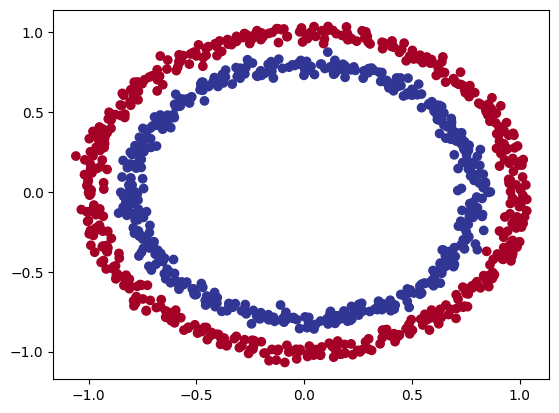

In [294]:
#visualizing more
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)




## Check input and output shape

In [295]:
X.shape, y.shape

((1000, 2), (1000,))

In [296]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [297]:
# view the first example of features and label

X_sample =X[0]
y_sample =y[0]

print(f"Values of one sample of X: {X_sample}, and values for one sample of y is :{y_sample}")
print(f"Shape of one sample of X is: {X_sample.shape} and shape of y for one sample is : {y_sample.shape}")

Values of one sample of X: [0.75424625 0.23148074], and values for one sample of y is :1
Shape of one sample of X is: (2,) and shape of y for one sample is : ()


## Turn data into tensors and create test and train split

In [298]:
import torch
torch.__version__

'2.0.1+cu118'

In [299]:
type(X), type(y), X.dtype

(numpy.ndarray, numpy.ndarray, dtype('float64'))

In [300]:
# turn data into tensors

X[:5]
y[990:]

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [301]:
type(X)

numpy.ndarray

In [302]:
# split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)



In [303]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [304]:
type(X_train)


numpy.ndarray

In [305]:
type(y_test)

numpy.ndarray

#Building a model
1. Setup the device agnostic code so the code will run on accelerator (GPU) if there is one
2. Construct a model (by subclassing nn.Module)
3. Define a loss function and optimizer
4.Create a training and test loop

In [306]:
#import pytorch and nn
import torch
from torch import nn

#making device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [307]:
X_train.shape

(800, 2)

#model building
1. subclasses nn.Module (almost all models in PyTorch subclass nn.Module)
2. create 2 nn.Linear() layers that are capable of handling the shape of the data
3. define a forward() method that outlines the forward pass or forward computation of the model
4. instantiate an instance of model and send it to the target device

In [308]:
#construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer1 = nn.Linear(in_features=2, out_features=5)
    self.layer2 = nn.Linear(in_features=5, out_features=1)

    #define a forward method that outlines the forward pass
    def forward(self, x):
      return self.layer2(self.layer1(x))

#instantiate an instance of model and send it to the target device
model_0 = CircleModelV0().to(device)
model_0



CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [309]:
next(model_0.parameters()).device

device(type='cpu')

In [310]:
#replicate the above model using nn.Sequencial()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [311]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

#Setting up loss function and optimizer

1. for regression we can use MAE/MSE
2. for classfication we can use cross entropy or catagorical cross entropy
3. most common optimizer adam and sgd

In [312]:
from torch.nn.modules.loss import BCEWithLogitsLoss
loss_fn =BCEWithLogitsLoss() #SIGMOID activation function built in in this loss function

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [313]:
#calculate accuracy

def accuracy_fn(y_true, y_pred):
  correct= torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

##Train
to train model for building a training lopp the following steps need to be done:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss Backward( backpropagation)
5. optimizer step (gradient descent)

the raw output of the model is called **logits**

going from raw logits--> prediction probabilities --> prediction labels

we can convert **logits** to **prediction probabilities** by passing them to some kind of activation function (sigmoid for binary classification, softmax for multiclass classification)

then we can convert our models prediction probabilities to prediction labels by either rounding them or taking the argmax(), rounding for binary and argmax() for multiclass classification


In [314]:
type(X_test)

numpy.ndarray

In [315]:
X_test.dtype
X_test = torch.from_numpy(X_test).to(dtype=torch.float32)


In [316]:
X_test.dtype



torch.float32

In [317]:
if isinstance(X_test, torch.Tensor):
    print("X_test is a PyTorch tensor.")
else:
    print("X_test is NOT a PyTorch tensor.")

X_test is a PyTorch tensor.


In [318]:
print(next(model_0.parameters()).device)


cpu


In [319]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_0 = model_0.to(device)
X_test = X_test.to(device)


In [320]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [321]:
y_test[:5]

array([1, 0, 1, 0, 1])

In [322]:
#using the sigmoid activation function on model logits to turn them into prediction probabilities
y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

In [323]:
y_preds= torch.round(y_pred_prob)
y_preds

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [324]:
 y_test[:5]

array([1, 0, 1, 0, 1])

In [325]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


#Buidling a training and testing loop

In [326]:
X_test.dtype
# X_test = X_test.to(dtype=torch.float64)


torch.float32

In [331]:
X_train.dtype
# X_train = torch.from_numpy(X_train).to(dtype=torch.float32)
# X_test = torch.from_numpy(X_test).to(dtype=torch.float32)



torch.float32

In [332]:
y_train.dtype

dtype('int64')

In [333]:
X_train = X_train.to(device)

In [334]:
y_train.dtype

dtype('int64')

In [335]:
X_test.dtype

torch.float32

In [336]:
y_test = torch.from_numpy(y_test).to(dtype=torch.float32)
y_train = torch.from_numpy(y_train).to(dtype=torch.float32)


In [337]:
y_test.dtype

torch.float32

In [338]:
# If y_train and y_test are already PyTorch tensors, then directly convert their dtype and move to device
y_train = y_train.to(device, dtype=torch.float32)
y_test = y_test.to(device, dtype=torch.float32)
# y_train = y_train.to(device, dtype=torch.float32)


In [339]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set the number of epochs
epochs =100


#put the data to the target device
# X_train, y_train = X_train.to(device), y_train.to(device)
# X_test, y_test = X_test.to(device), y_test.to(device)

#building training and evaluation loop

for epoch in range(epochs):
  ###training
  model_0.train()

  #1. forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(y_logits))

  #2. calcualte loss / accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward (calculate the gradients respect to all of the parameters in the model)
  loss.backward()

  #optimizer step (update the parameters to reduce the gradients/ gradient descent)
  optimizer.step()

  #testing
  model_0.eval()
  with torch.inference_mode():
    #1. forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))

    # 2. calculate the loss and accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred=test_pred)

  #print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")







Epoch: 0 | Train Loss: 0.69796 | Train accuracy: 51.88% | Test Loss: 0.69440, Test Accuracy: 58.00%
Epoch: 10 | Train Loss: 0.69590 | Train accuracy: 51.25% | Test Loss: 0.69305, Test Accuracy: 53.00%
Epoch: 20 | Train Loss: 0.69490 | Train accuracy: 51.62% | Test Loss: 0.69254, Test Accuracy: 49.50%
Epoch: 30 | Train Loss: 0.69435 | Train accuracy: 51.12% | Test Loss: 0.69236, Test Accuracy: 49.50%
Epoch: 40 | Train Loss: 0.69401 | Train accuracy: 50.88% | Test Loss: 0.69232, Test Accuracy: 51.00%
Epoch: 50 | Train Loss: 0.69378 | Train accuracy: 50.25% | Test Loss: 0.69234, Test Accuracy: 50.00%
Epoch: 60 | Train Loss: 0.69362 | Train accuracy: 50.00% | Test Loss: 0.69239, Test Accuracy: 51.50%
Epoch: 70 | Train Loss: 0.69351 | Train accuracy: 50.25% | Test Loss: 0.69246, Test Accuracy: 51.00%
Epoch: 80 | Train Loss: 0.69342 | Train accuracy: 49.88% | Test Loss: 0.69254, Test Accuracy: 50.00%
Epoch: 90 | Train Loss: 0.69336 | Train accuracy: 49.88% | Test Loss: 0.69262, Test Accuracy

In [340]:
X_train.dtype

torch.float32

In [341]:
type(y_test)

torch.Tensor

In [342]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

#Make Predictions and Evaluate the model

In [343]:
import requests
from pathlib import Path
#download helper function from learn pytorch repo(if its not already downloaded)

if Path("helper_functions.py").is_file():
  print("helper_functions.py does exists, skipping downloaded")
else:
  print("downloading helper_functions.py")
  request =requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py does exists, skipping downloaded


In [344]:
from helper_functions import plot_predictions, plot_decision_boundary

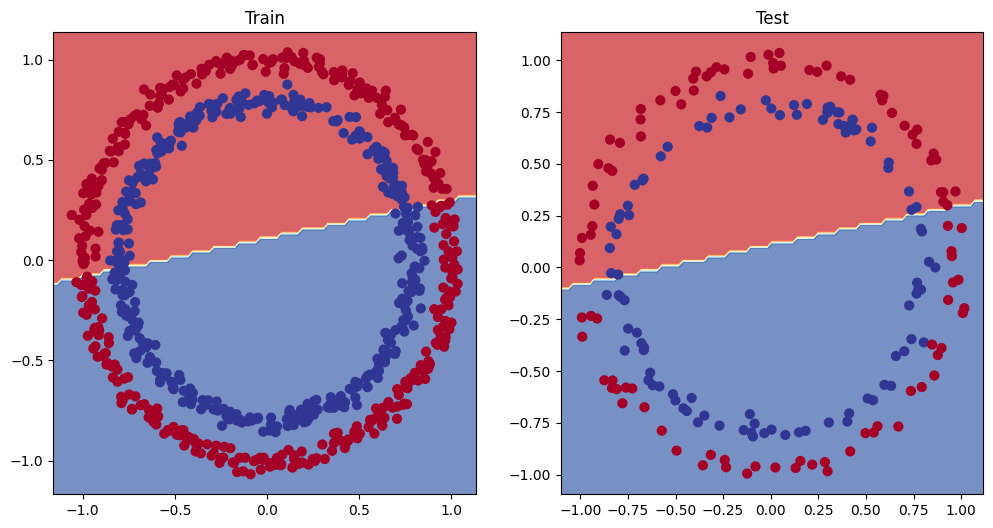

In [345]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

#Improving the model performance
1. adding more layers
2. adding more hidden units in layers
3. fit for longer
4. change the activation/optimization function
5. change the learning rate
6. change the loss function

In [346]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0849, -0.2762],
                      [ 0.4610, -0.5187],
                      [-0.3271, -0.1947],
                      [-0.4220,  0.0507],
                      [-0.7016,  0.6600]])),
             ('0.bias', tensor([-0.6060,  0.5246,  0.1149, -0.2211,  0.4275])),
             ('1.weight',
              tensor([[ 0.0741,  0.2406,  0.0222, -0.1075,  0.1965]])),
             ('1.bias', tensor([-0.1888]))])

In [347]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [348]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    #adding more hidden units and an extra layer as hyper parameters tuning
    self.layer_1 =nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 =CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [349]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [350]:
#after model building now need to make a loss function
#and optimizer and a training and validation loop

In [351]:
#create a loss function
loss_fn = nn.BCEWithLogitsLoss()
#create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                         lr=0.1)

In [352]:
#writing a training and validation loop for model_1

torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set epochs
epochs =1000 #increasing it from 100

#put the data for target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#writing training loop
for epoch in range(epochs):
  #training
  model_1.train()
  #forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #logits --> pred probabilities ---> prediction class


  # loss calculation
  loss = loss_fn(y_logits, y_train)
  acc =accuracy_fn(y_true= y_train, y_pred= y_pred)

  #optimizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #optimizer step
  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    #forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred =torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, test_pred)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  #printing whats happenings
  if epoch %100 == 0:
    print(f"Ëpoch: {epoch} | Train Loss: {loss:.5f} | Train Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}")


Ëpoch: 0 | Train Loss: 0.69396 | Train Acc: 50.88 | Test Loss: 0.66544 | Test Accuracy: 51.00
Ëpoch: 100 | Train Loss: 0.69305 | Train Acc: 50.38 | Test Loss: 0.68423 | Test Accuracy: 48.00
Ëpoch: 200 | Train Loss: 0.69299 | Train Acc: 51.12 | Test Loss: 0.67922 | Test Accuracy: 46.00
Ëpoch: 300 | Train Loss: 0.69298 | Train Acc: 51.62 | Test Loss: 0.67719 | Test Accuracy: 45.00
Ëpoch: 400 | Train Loss: 0.69298 | Train Acc: 51.12 | Test Loss: 0.67651 | Test Accuracy: 46.00
Ëpoch: 500 | Train Loss: 0.69298 | Train Acc: 51.00 | Test Loss: 0.67628 | Test Accuracy: 46.00
Ëpoch: 600 | Train Loss: 0.69298 | Train Acc: 51.00 | Test Loss: 0.67621 | Test Accuracy: 46.00
Ëpoch: 700 | Train Loss: 0.69298 | Train Acc: 51.00 | Test Loss: 0.67618 | Test Accuracy: 46.00
Ëpoch: 800 | Train Loss: 0.69298 | Train Acc: 51.00 | Test Loss: 0.67617 | Test Accuracy: 46.00
Ëpoch: 900 | Train Loss: 0.69298 | Train Acc: 51.00 | Test Loss: 0.67617 | Test Accuracy: 46.00


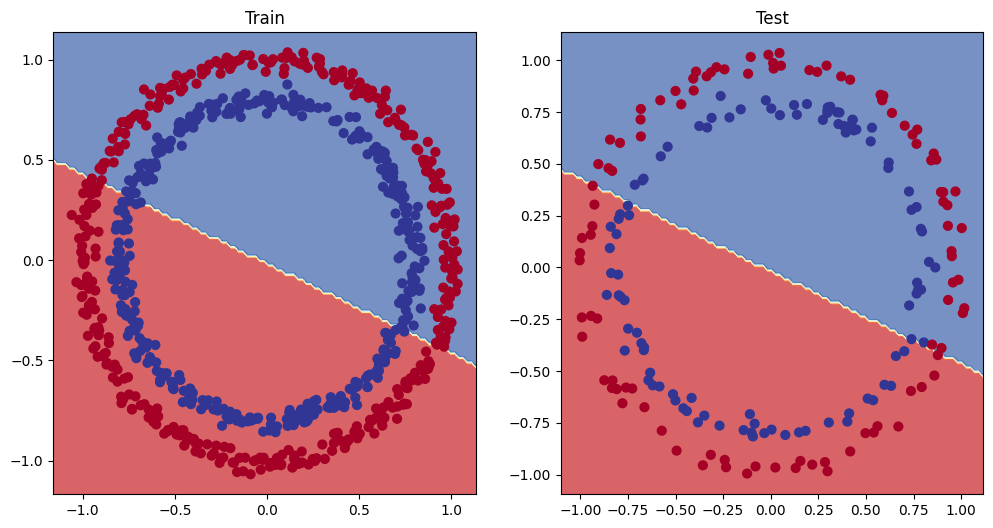

In [353]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [354]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [426]:
#building a model with non Linear activation function

from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.layer_1=nn.Linear(in_features=2, out_features=20)
    self.layer_2=nn.Linear(in_features=20, out_features=100)
    self.layer_3=nn.Linear(in_features=100, out_features=10)
    self.layer_4=nn.Linear(in_features=10, out_features=1)
    self.relu= nn.ReLU()


  def forward(self,x):
    return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=100, bias=True)
  (layer_3): Linear(in_features=100, out_features=10, bias=True)
  (layer_4): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [429]:
#loss and optimizer setting

loss_fn =nn.BCEWithLogitsLoss()
optimizer= torch.optim.SGD(params=model_3.parameters(),
                        lr=0.01)

In [416]:
len(X_test), len(y_test)

(200, 200)

In [358]:
y_test.shape

torch.Size([200])

In [430]:
#training code
#random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#device agnostic code
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#set epoch
epochs = 1000

#training loop
for epoch in range(epochs):
  model_3.train()

  #forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred= y_pred)

  #optimizer zero grad
  optimizer.zero_grad()

  #backpropagation
  loss.backward()

  #optimizer step #gradient descent
  optimizer.step()

  #testing
  model_3.eval()

  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_accuracy = accuracy_fn(y_true = y_test, y_pred = test_pred)

  #printing everything
  if epoch %100 == 0:
    print(f"Ëpoch: {epoch} | Training Accuracy:  {acc:.2f}% | Training Loss: {loss:.4f} | Testing Loss: {test_loss:.4f} | Testing Accuracy: {test_accuracy:2f}%")


Ëpoch: 0 | Training Accuracy:  100.00% | Training Loss: 0.0233 | Testing Loss: 0.0414 | Testing Accuracy: 100.000000%
Ëpoch: 100 | Training Accuracy:  100.00% | Training Loss: 0.0222 | Testing Loss: 0.0398 | Testing Accuracy: 100.000000%
Ëpoch: 200 | Training Accuracy:  100.00% | Training Loss: 0.0211 | Testing Loss: 0.0384 | Testing Accuracy: 100.000000%
Ëpoch: 300 | Training Accuracy:  100.00% | Training Loss: 0.0202 | Testing Loss: 0.0370 | Testing Accuracy: 100.000000%
Ëpoch: 400 | Training Accuracy:  100.00% | Training Loss: 0.0193 | Testing Loss: 0.0358 | Testing Accuracy: 100.000000%
Ëpoch: 500 | Training Accuracy:  100.00% | Training Loss: 0.0185 | Testing Loss: 0.0346 | Testing Accuracy: 100.000000%
Ëpoch: 600 | Training Accuracy:  100.00% | Training Loss: 0.0177 | Testing Loss: 0.0335 | Testing Accuracy: 100.000000%
Ëpoch: 700 | Training Accuracy:  100.00% | Training Loss: 0.0171 | Testing Loss: 0.0325 | Testing Accuracy: 100.000000%
Ëpoch: 800 | Training Accuracy:  100.00% |

In [431]:
model_3.state_dict()


OrderedDict([('layer_1.weight',
              tensor([[ 0.8699,  1.1947],
                      [-0.1223,  1.3108],
                      [-0.2856,  0.1456],
                      [-0.4082,  0.6139],
                      [ 0.5725, -0.5378],
                      [ 1.3043,  0.5758],
                      [ 0.5848, -0.0788],
                      [ 0.5398, -0.1638],
                      [ 0.5370,  0.1248],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.8606,  1.1710],
                      [-1.6790, -0.6925],
                      [-0.3450, -0.5133],
                      [ 0.0169, -1.2887],
                      [ 1.0793, -1.1597],
                      [ 1.0807,  0.2083],
                      [-0.7404,  0.8247],
                      [ 0.3524,  0.7068],
                      [ 0.0773, -0.2230]])),
             ('layer_1.bias',
              tensor([-0.3511, -0.3465,  0.3218,  0.7554,  0.2608, -0.4227,  0.6116, -0.0739,
 

In [432]:
#make predictions
model_3.eval()
with torch.inference_mode():
  y_pred=torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_pred[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

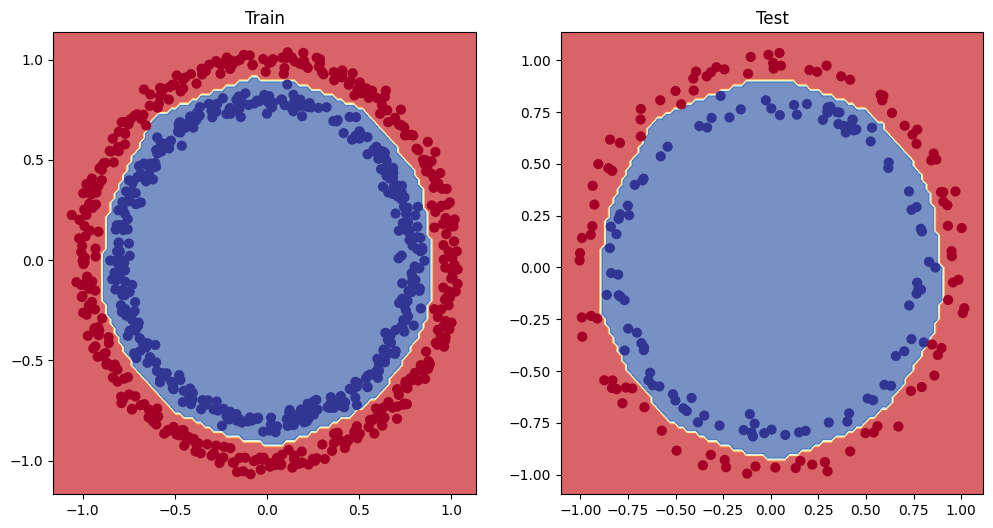

In [433]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

#Multi Class Classification

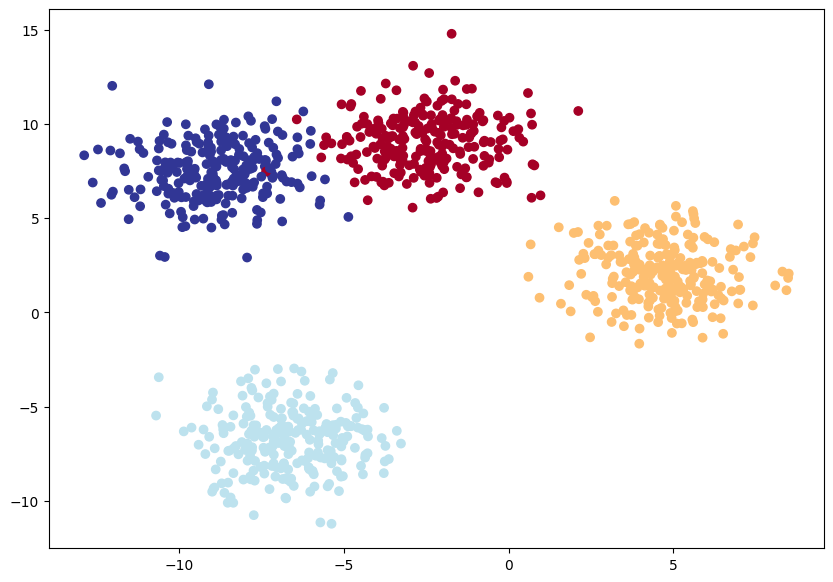

In [406]:
# creating a toy multiclass dataset

#importing the dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set the hyperparameters for data creatiom
#BLOCK LETTER AS CONVENTION

NUM_CLASSES =4
NUM_FEATURES =2
RANDOM_SEED =42

#create multi class dataset

X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED
                            )

#turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob =torch.from_numpy(y_blob).type(torch.LongTensor)

#split the data into test train split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(
    X_blob, y_blob, test_size=0.2,
    random_state= RANDOM_SEED
)

#plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)


In [407]:
#build device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [408]:

#build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units =8):
    super().__init__()
    self.linear_layer_stack= nn.Sequential(
      nn.Linear(in_features= input_features, out_features =hidden_units),
      # nn.ReLU()
      nn.Linear(in_features= hidden_units, out_features= hidden_units),
      #nn.ReLU()
      nn.Linear(in_features = hidden_units, out_features = output_features),
  )
  def forward(self, x):
    return self.linear_layer_stack(x)

#initialize the model and send it to the device
model_4 = BlobModel(input_features=2, output_features =4, hidden_units =8).to(device)
model_4




BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [409]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [410]:
#setting the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params= model_4.parameters(),
    lr=0.1
)

logits(raw oputput of the model)--->prediction probabilities (by using softmax) and then prediction labels(by using argmax)

In [411]:
#create a training and testing lopp for multiclass classfication model
import torch
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#device agnostic code
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

epochs =100

for epoch in range(epochs):
  model_4.train()

  #forward pass
  y_blob_logits = model_4(X_blob_train)
  y_blob_preds = torch.softmax(y_blob_logits, dim=1).argmax(dim=1)

  #calculate loss
  loss = loss_fn(y_blob_logits, y_blob_train)

  #calculate accuracy
  acc =accuracy_fn(y_true= y_blob_train, y_pred =y_blob_preds)

  optimizer.zero_grad()

  loss.backward() #backpropagation

  optimizer.step() #gradient descent


  #testing
  model_4.eval()
  with torch.inference_mode():
    y_blob_test_logits = model_4(X_blob_test)
    y_blob_test_preds = torch.softmax(y_blob_test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(y_blob_test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true= y_blob_test, y_pred= y_blob_test_preds)


#printing everything
  if epoch %10 == 0:
    print(f"Ëpoch: {epoch} |  Training Loss: {loss:.4f} | Training Accuracy:  {acc:.2f}% | Testing Loss: {test_loss:.4f} | Testing Accuracy: {test_acc:2f}%")




Ëpoch: 0 |  Training Loss: 1.0432 | Training Accuracy:  65.50% | Testing Loss: 0.5786 | Testing Accuracy: 95.500000%
Ëpoch: 10 |  Training Loss: 0.1440 | Training Accuracy:  99.12% | Testing Loss: 0.1304 | Testing Accuracy: 99.000000%
Ëpoch: 20 |  Training Loss: 0.0806 | Training Accuracy:  99.12% | Testing Loss: 0.0722 | Testing Accuracy: 99.500000%
Ëpoch: 30 |  Training Loss: 0.0592 | Training Accuracy:  99.12% | Testing Loss: 0.0513 | Testing Accuracy: 99.500000%
Ëpoch: 40 |  Training Loss: 0.0489 | Training Accuracy:  99.00% | Testing Loss: 0.0410 | Testing Accuracy: 99.500000%
Ëpoch: 50 |  Training Loss: 0.0429 | Training Accuracy:  99.00% | Testing Loss: 0.0349 | Testing Accuracy: 99.500000%
Ëpoch: 60 |  Training Loss: 0.0391 | Training Accuracy:  99.00% | Testing Loss: 0.0308 | Testing Accuracy: 99.500000%
Ëpoch: 70 |  Training Loss: 0.0364 | Training Accuracy:  99.00% | Testing Loss: 0.0280 | Testing Accuracy: 99.500000%
Ëpoch: 80 |  Training Loss: 0.0345 | Training Accuracy:  

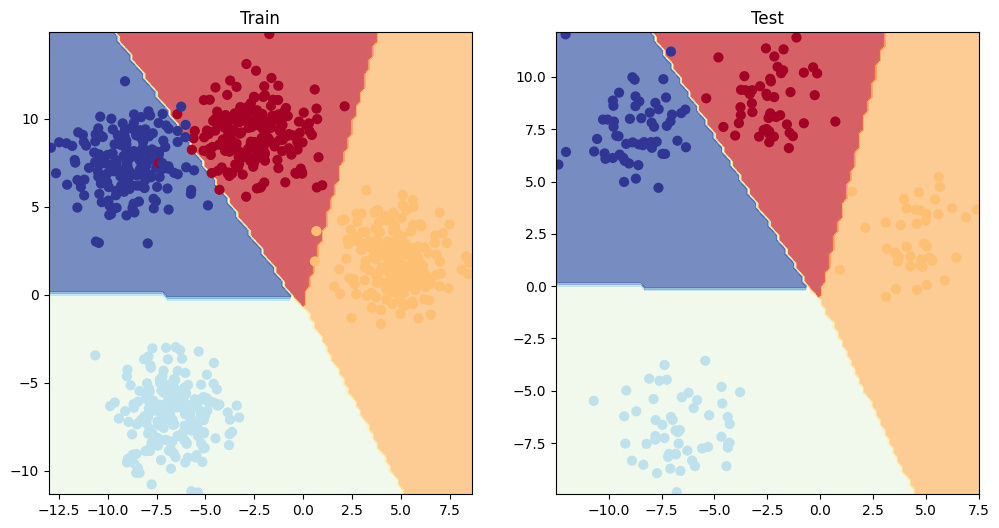

In [412]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [434]:
# a few more evaluation matrix



In [436]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 9.4 MB/s eta 0:00:00


In [445]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task="multiclass", num_classes=NUM_CLASSES).to(device)

torchmetric_accuracy(y_blob_test_logits, y_blob_test)


tensor(0.9950)